# Pre-reqs
## Create the following directory structure in a GCP GCS Bucket
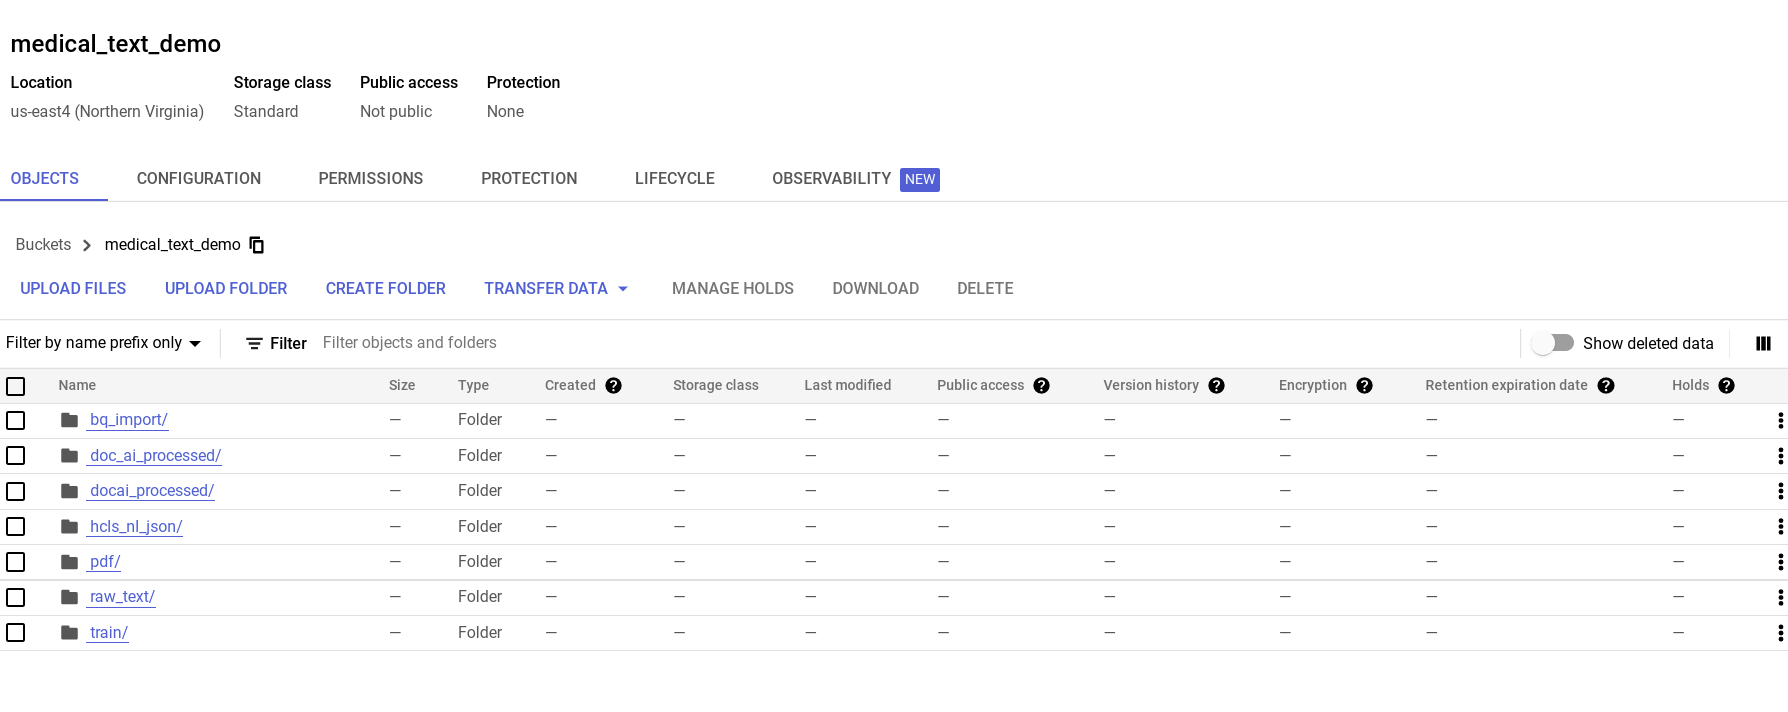
## Add service account as storage admin to the bucket

In [1]:
USE_SERVICE_ACCOUNT=True # @param {type:"string"} <---CHANGE THESE

import sys
import os

FILE_EXISTS=os.path.exists( '/content/service_account.json' )
IN_COLAB = 'google.colab' in sys.modules 
%env IN_COLAB=$IN_COLAB

if USE_SERVICE_ACCOUNT:
  if IN_COLAB and not FILE_EXISTS:
    from google.colab import files

    uploaded = files.upload()

    for fn in uploaded.keys():
      txt = "User uploaded file {name} with length {length} bytes".format( name=fn, length=len(uploaded[fn]))
      print( txt )
      
    import os  
    os.rename(f"/content/{fn}",'/content/service_account.json')
else:
  from google.colab import auth
  auth.authenticate_user()  

env: IN_COLAB=True


Saving kallogjeri-project-345114@appspot.gserviceaccount.com.json to kallogjeri-project-345114@appspot.gserviceaccount.com.json
User uploaded file kallogjeri-project-345114@appspot.gserviceaccount.com.json with length 2336 bytes


In [2]:
from google.colab import drive

drive.mount('/drive', force_remount=True)


Mounted at /drive


#Install Packages

In [ ]:
import sys
import subprocess
import pkg_resources

# WORKSPACE_LIB = '/drive/MyDrive/workspace'
# PYTHON_LIB_PATH= f"{WORKSPACE_LIB}/python3.7/site-packages"

# if PYTHON_LIB_PATH not in sys.path:  
#     sys.path.insert(0, PYTHON_LIB_PATH)

print(sys.path)    

required = {      
        'colabcode'            
      , 'google-cloud-language'      
      , 'google-cloud-documentai'      
      , 'google-cloud-aiplatform'
      , 'google-api-core'    
    }

required = {pkg.split('==')[0] if '==' in pkg else pkg for pkg in required}
installed = {pkg.key for pkg in pkg_resources.working_set}
print(f"installed: {installed}")
missing = required - installed
print(f"missing: {missing}")
if missing:
    python = sys.executable
    #subprocess.check_call([python, '-m', 'pip', 'install', '--upgrade', f"--target={PYTHON_LIB_PATH}", *missing], stdout=subprocess.DEVNULL)
    subprocess.check_call([python, '-m', 'pip', 'install', '--upgrade', *missing], stdout=subprocess.DEVNULL)

    import IPython
    import time
    print( 'restarting kernel...' )
    app = IPython.Application.instance()
    app.kernel.do_shutdown(True)    
    
    # Wait for the kernel to "crash". Haven't found a more elegant workaround for do_shutdown being an async call...    

['.', '/drive/MyDrive/workspace', '/drive/MyDrive/workspace/python3.7/site-packages', '/content', '/env/python', '/usr/lib/python37.zip', '/usr/lib/python3.7', '/usr/lib/python3.7/lib-dynload', '', '/usr/local/lib/python3.7/dist-packages', '/usr/lib/python3/dist-packages', '/usr/local/lib/python3.7/dist-packages/IPython/extensions', '/root/.ipython']
{'bokeh', 'html5lib', 'pygments', 'alabaster', 'moviepy', 'python-dateutil', 'torch', 'jaxlib', 'torchsummary', 'beautifulsoup4', 'glob2', 'python-utils', 'flask', 'fastdtw', 'sphinxcontrib-websupport', 'cufflinks', 'opencv-python', 'httplib2shim', 'sphinxcontrib-serializinghtml', 'google-resumable-media', 'pytest', 'pandocfilters', 'sqlparse', 'jupyter-console', 'catalogue', 'korean-lunar-calendar', 'lxml', 'imageio', 'xarray-einstats', 'tensorboard-data-server', 'colorcet', 'plotly', 'editdistance', 'astunparse', 'imbalanced-learn', 'prompt-toolkit', 'nibabel', 'fastdownload', 'google-cloud-bigquery', 'lmdb', 'pymystem3', 'parso', 'rsa',

# Upload service account keyfile

In [4]:
%%bash

mkdir -p /drive/MyDrive/workspace

if [ -d /drive/MyDrive/workspace/gcputils ] 
then
    cd  /drive/MyDrive/workspace/gcputils
    git pull
else
    git clone https://github.com/aburdenko/gcputils.git
fi

Already up to date.



# (Optional) Run Colabcode from the colab terminal


chmod +x /drive/MyDrive/workspace/colabcode/colab.sh <br/>
/drive/MyDrive/workspace/colabcode/colab.sh


In [5]:
PROJECT_ID = "kallogjeri-project-345114" # @param {type:"string"} <---CHANGE THESE
DATASET_NAME = "entities" # @param {type:"string"} <---CHANGE THESE
LOCATION = "us" # @param {type:"string"} <---CHANGE THESE
PROC_ID = "618bddd4359b5183" # @param {type:"string"} <---CHANGE THESE

GOOGLE_APPLICATION_CREDENTIALS="/content/service_account.json" #@param {type:"string"} <---CHANGE THESE

# Format: gs://bucket/directory/file.pdf
# GCS_INPUT_URI = "gs://medical_text_demo/bq_import"  # @param {type:"string"} <---CHANGE THESE
# GCS_INPUT_URI2 = ""  # @param {type:"string"} <---CHANGE THESE
# GCS_INPUT_URI3 = ""  # @param {type:"string"} <---CHANGE THESE
# GCS_INPUT_URI4 = ""

GCS_INPUT_URI = "gs://medical_text_demo/pdf"  # @param {type:"string"} <---CHANGE THESE
GCS_INPUT_URI2 = "gs://medical_text_demo/raw_text"  # @param {type:"string"} <---CHANGE THESE
GCS_INPUT_URI3 = "gs://medical_text_demo/hcls_nl_json"  # @param {type:"string"} <---CHANGE THESE
GCS_INPUT_URI4 = "gs://medical_text_demo/bq_import"  # @param {type:"string"} <---CHANGE THESE


import sys

%env GOOGLE_APPLICATION_CREDENTIALS=$GOOGLE_APPLICATION_CREDENTIALS
%env REGION=$REGION
%env PROJECT_HOME=$PROJECT_HOME

!gcloud config set project $PROJECT_ID -q

env: GOOGLE_APPLICATION_CREDENTIALS=/content/service_account.json
env: REGION=$REGION
env: PROJECT_HOME=$PROJECT_HOME
Updated property [core/project].


In [8]:
def set_path():
  import sys 

  WORKSPACE_LIB = '/drive/MyDrive/workspace'
  # PYTHON_LIB_PATH= f"{WORKSPACE_LIB}/python3.7/site-packages"
    
  # if PYTHON_LIB_PATH not in sys.path:  
  #   sys.path.insert(0, PYTHON_LIB_PATH)

  if WORKSPACE_LIB not in sys.path:  
    sys.path.insert(0, WORKSPACE_LIB)
      
  if '.' not in sys.path:
    sys.path.insert(0, '.')  

  print(sys.path)

set_path()

['.', '/drive/MyDrive/workspace', '/drive/MyDrive/workspace/python3.7/site-packages', '/content', '/env/python', '/usr/lib/python37.zip', '/usr/lib/python3.7', '/usr/lib/python3.7/lib-dynload', '', '/usr/local/lib/python3.7/dist-packages', '/usr/lib/python3/dist-packages', '/usr/local/lib/python3.7/dist-packages/IPython/extensions', '/root/.ipython']


In [9]:
# Test
from google.api_core.client_options import ClientOptions
from google.cloud import documentai

opts = ClientOptions(api_endpoint=f"{LOCATION}-documentai.googleapis.com")
docai_client = documentai.DocumentProcessorServiceClient(client_options=opts)

ImportError: ignored

In [ ]:
%reload_ext autoreload
%autoreload 2

In [ ]:
from gcputils.doc_ai import process_uris
from google.cloud import documentai_v1 as documentai

def concat(*args, sep=","):
    return sep.join(args)

gcs_input_str = concat(GCS_INPUT_URI, GCS_INPUT_URI2, GCS_INPUT_URI3, GCS_INPUT_URI4)
gcs_inputs = gcs_input_str.split(',')


process_uris(gcs_inputs, project_id=PROJECT_ID, location=LOCATION, proc_id=PROC_ID, bq_dataset=DATASET_NAME)          

# Results
You should have the following two Bigquery Tables Loaded

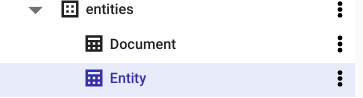